<h1 align="center">Práctica de Aprendizaje No Supervisado </h1>
<br>
<h4 align="right">Armando Olivares<h4>

Objectivo: En esta seccion aplicaremos diversas técnicas de clustering al dataset ``songs_spotify`` el cual contiene el análisis métrico de más de 6000 canciones que han estado en la lista 100 billboard desde el año 1940, este dataset fue extraido utilizando el API de spotify extrayendo canción por canción, por lo que no esta disponible directamente en la web.


Comenzaremos importanto las librerias necesarias:

In [526]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set() 
import numpy as np

Leemos el Archivo:


In [527]:
songs = pd.read_csv('songs_spotify.csv' , encoding = "cp1252", index_col=0)
del songs["0"]
songs.head()
print(songs.shape)

(6784, 22)


Nuestro dataset contiene las siguientes metricas:

<style>
td.column-1 {
    width= 10% !important;
}
td.column-2 {
    width= 20% !important;
}
td.column-3 {
    width= 70% !important;
}
</style>

<table id="tablepress-215" class="tablepress table tablepress-id-215" style="table-layout:fixed; width: 100%;">
<thead>
<tr class="row-1 odd">
	<th class="column-1">Nombre</th><th class="column-2">Tipo</th><th class="column-3">Descripción</th>
</tr>
</thead>
<tbody class="row-hover">
<tr class="row-2 even">
	<td class="column-1" width="10%;">acousticness</td><td class="column-2">float</td><td class="column-3">Metrica de confianza de 0.0 a 1.0 de si la pista es acústica. 1.0 representa una alta confianza de que la pista es acústica.</td>
</tr>
<tr class="row-3 odd">
	<td class="column-1">analysis_url</td><td class="column-2">string</td><td class="column-3">Una URL HTTP para acceder al análisis de audio completo de esta pista. </td>
</tr>
<tr class="row-4 even">
	<td class="column-1">danceability</td><td class="column-2">float</td><td class="column-3">Un valor de 0.0 la pista es menos bailable y 1.0 es más bailable.  </td>
</tr>
<tr class="row-5 odd">
	<td class="column-1">duration_ms</td><td class="column-2">int</td><td class="column-3">La duración de la pista en  milisegundoss.</td>
</tr>
<tr class="row-6 even">
	<td class="column-1">energy</td><td class="column-2">float</td><td class="column-3">Es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Normalmente, las pistas energéticas se sienten rápidas y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que el preludio de Bach tiene un puntaje bajo en la escala.</td>
</tr>
<tr class="row-7 odd">
	<td class="column-1">id</td><td class="column-2">string</td><td class="column-3">El ID </td>
</tr>
<tr class="row-8 even">
	<td class="column-1">instrumentalness</td><td class="column-2">float</td><td class="column-3">Los sonidos "Ooh" y "aah" se consideran instrumentales en este contexto. Las pistas de rap o de palabra hablada son claramente "vocales". Cuanto más cerca esté el valor de instrumentación a 1.0, mayor será la probabilidad de que la pista no contenga contenido vocal. Los valores por encima de 0.5 están destinados a representar pistas instrumentales, pero la confianza es mayor cuando el valor se acerca a 1.0.</td>
</tr>
<tr class="row-9 odd">
	<td class="column-1">key</td><td class="column-2">int</td><td class="column-3">La clave en la que se encuentra la pista. Los enteros se asignan a las afinaciones utilizando la notación de clase de tono estándar.</td>
</tr>
<tr class="row-10 even">
	<td class="column-1">liveness</td><td class="column-2">float</td><td class="column-3">Detecta la presencia de una audiencia en la grabación. Valores de vida más altos representaron una mayor probabilidad de que la pista se realizara en vivo. Un valor por encima de 0.8 proporciona una gran probabilidad de que la pista sea en vivo.</td>
</tr>
<tr class="row-11 odd">
	<td class="column-1">loudness</td><td class="column-2">float</td><td class="column-3">El nivel de volumen general de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar el volumen relativo de las pistas. La sonoridad es la calidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Valores típicos rango entre -60 y 0 db.</td>
</tr>
<tr class="row-12 even">
	<td class="column-1">mode</td><td class="column-2">int</td><td class="column-3">Indica el modo(mayor o menor) de una pista, el tipo de escala a partir de la cual se deriva su contenido melódico. Mayor está representado por 1 y menor es 0.</td>
</tr>
<tr class="row-13 odd">
	<td class="column-1">speechiness</td><td class="column-2">float</td><td class="column-3">Detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente habla, como en la grabación (por ejemplo, talk show, audiolibro, poesía), más cercano a 1.0 el valor del atributo. Los valores superiores a 0.66 describen pistas que probablemente estén hechas enteramente de palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como discurso, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0.33 probablemente representaron la música y otras pistas que no son del habla.</td>
</tr>
<tr class="row-14 even">
	<td class="column-1">tempo</td><td class="column-2">float</td><td class="column-3">El tempo general estimado de una pista en tiempos por minuto (BPM). En la terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y deriva directamente de la duración media del tiempo.</td>
</tr>
<tr class="row-15 odd">
	<td class="column-1">time_signature</td><td class="column-2">int</td><td class="column-3">Una firma de tiempo general estimada de una pista. La signatura de tiempo (meter) es una convención para especificar cuántos beats hay en cada barra (o medida)</td>
</tr>
<tr class="row-16 even">
	<td class="column-1">track_href</td><td class="column-2">string</td><td class="column-3">Un link a la Web API.</td>
</tr>
<tr class="row-17 odd">
	<td class="column-1">type</td><td class="column-2">string</td><td class="column-3">El tipo de objeto: "audio_features"</td>
</tr>
<tr class="row-18 even">
	<td class="column-1">uri</td><td class="column-2">string</td><td class="column-3">El URI de la pista en spotify </td>
</tr>
<tr class="row-19 odd">
	<td class="column-1">valence</td><td class="column-2">float</td><td class="column-3">Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, alegre, alegre, eufórica), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, triste, deprimido, enojado).</td>
</tr>
</tbody>
</table>

### Algunos Estadísticos Básicos de nuestro Dataset

In [528]:
print(songs.shape)
print(songs.describe())
print(songs.dtypes)

(6784, 22)
              year         rank  danceability       energy          key  \
count  6784.000000  6784.000000   6784.000000  6784.000000  6784.000000   
mean   1980.936468    48.266952      0.594968     0.558570     5.189858   
std      20.812841    29.011880      0.169932     0.232045     3.592370   
min    1940.000000     1.000000      0.000000     0.000000     0.000000   
25%    1965.000000    23.000000      0.488000     0.387000     2.000000   
50%    1982.000000    47.000000      0.614000     0.572000     5.000000   
75%    1999.000000    73.000000      0.718000     0.746000     8.000000   
max    2016.000000   100.000000      0.991000     0.997000    11.000000   

          loudness         mode  speechiness  acousticness  instrumentalness  \
count  6784.000000  6784.000000  6784.000000   6784.000000       6784.000000   
mean     -9.486935     0.701061     0.068967      0.352251          0.092913   
std       4.228242     0.457827     0.081736      0.326935          0.241

No tenenemos valores de NA's pero de un análisis previo sabemos que hay filas enteras de ceros (alrededor de 57 registros) que debemos eliminar:

In [529]:
sum(songs["analysis_url"]=="0")

47

In [530]:
songs = songs[songs.analysis_url != '0']
print(songs.shape)

(6737, 22)


Seleccionamos Solo las Variables númericas:

In [531]:
new_songs = songs.select_dtypes(include=[np.number])
new_songs.head()

,year,rank,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1940,1,0.676,0.293,11,-9.720,1,0.0366,0.845,0.000048,0.117,0.332,102.241,193387,4
1,1940,2,0.242,0.243,7,-16.246,1,0.0337,0.903,0.000041,0.357,0.152,133.185,219213,4
2,1940,3,0.254,0.154,0,-13.296,1,0.0396,0.902,0.002290,0.118,0.243,174.018,181600,3
3,1940,4,0.467,0.524,9,-13.217,0,0.0547,0.614,0.301000,0.155,0.650,93.518,159133,4
4,1940,5,0.582,0.628,10,-5.892,1,0.0407,0.240,0.000000,0.102,0.530,121.987,204053,4


In [532]:
pd.isnull(new_songs).sum()

year                0
rank                0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

Examinando los datos observamos que existen rangos de valores muy distantes entre las variables por lo que decidimos escalar los datos y converir las variables categoricas a númericas con one-hot-encoding.

In [533]:
print(new_songs.shape)
from sklearn import preprocessing
ndf_ts = pd.get_dummies(new_songs.loc[:,"time_signature"], prefix="time_sig")
#new_songs.loc[:,"time_signature"].value_counts()
print(ndf_ts.shape)
ndf_k = pd.get_dummies(new_songs.loc[:,"key"], prefix="key")
#ndf = new_songs
print(ndf_k.shape)
#ndf = new_songs.drop(["loudness", "tempo", "duration_ms", "time_signature", "year", "rank", "key", "mode"], axis=1)
ndf = new_songs.copy()

(6737, 15)
(6737, 5)
(6737, 12)


In [534]:
#ndf = pd.concat([new_songs,  ndf_k], axis=1)
ndf = ndf.drop(["time_signature", "year", "rank", "key", "mode"], axis=1)
ndf

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.676,0.2930,-9.720,0.0366,0.845000,0.000048,0.1170,0.3320,102.241,193387
1,0.242,0.2430,-16.246,0.0337,0.903000,0.000041,0.3570,0.1520,133.185,219213
2,0.254,0.1540,-13.296,0.0396,0.902000,0.002290,0.1180,0.2430,174.018,181600
3,0.467,0.5240,-13.217,0.0547,0.614000,0.301000,0.1550,0.6500,93.518,159133
4,0.582,0.6280,-5.892,0.0407,0.240000,0.000000,0.1020,0.5300,121.987,204053
5,0.964,0.2750,-13.516,0.0497,0.494000,0.000003,0.0753,0.8220,115.978,176480
6,0.388,0.2510,-15.040,0.1310,0.622000,0.000002,0.3540,0.2460,132.099,182533
7,0.650,0.4170,-10.349,0.0463,0.762000,0.405000,0.0872,0.9240,78.201,136707
8,0.425,0.5700,-11.026,0.0506,0.756000,0.012500,0.2250,0.7550,170.426,204453
9,0.539,0.1660,-18.107,0.0611,0.913000,0.023000,0.1120,0.3900,142.354,182000


In [535]:
print(ndf.shape)
#preprocessing.scale(ndf)
min_max_scaler = preprocessing.MinMaxScaler()
ndf_lod_tempo = pd.DataFrame(min_max_scaler.fit_transform(ndf[[ "tempo", "loudness"]]), columns=[ "tempo_norm", "loudness_norm"], index=ndf.index.tolist())
ndf = pd.concat([ndf,ndf_lod_tempo], axis=1)
ndf = ndf.drop(["loudness", "tempo", "duration_ms"], axis=1)
#ndf.head()




(6737, 10)


In [536]:
np.isnan(pd.concat([ndf,(ndf_lod_tempo)], axis=1)).sum()

danceability        0
energy              0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo_norm          0
loudness_norm       0
tempo_norm          0
loudness_norm       0
dtype: int64

In [537]:
ndf

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo_norm,loudness_norm
0,0.676,0.2930,0.0366,0.845000,0.000048,0.1170,0.3320,0.419890,0.775762
1,0.242,0.2430,0.0337,0.903000,0.000041,0.3570,0.1520,0.546972,0.616440
2,0.254,0.1540,0.0396,0.902000,0.002290,0.1180,0.2430,0.714668,0.688460
3,0.467,0.5240,0.0547,0.614000,0.301000,0.1550,0.6500,0.384065,0.690388
4,0.582,0.6280,0.0407,0.240000,0.000000,0.1020,0.5300,0.500984,0.869217
5,0.964,0.2750,0.0497,0.494000,0.000003,0.0753,0.8220,0.476305,0.683089
6,0.388,0.2510,0.1310,0.622000,0.000002,0.3540,0.2460,0.542512,0.645883
7,0.650,0.4170,0.0463,0.762000,0.405000,0.0872,0.9240,0.321161,0.760406
8,0.425,0.5700,0.0506,0.756000,0.012500,0.2250,0.7550,0.699916,0.743878
9,0.539,0.1660,0.0611,0.913000,0.023000,0.1120,0.3900,0.584628,0.571007


In [538]:
ndf = ndf.loc[ (np.isnan(ndf.tempo_norm)) != True, :]

In [539]:
print(ndf.columns)
print(ndf.describe())

Index(['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo_norm',
       'loudness_norm'],
      dtype='object')
       danceability       energy  speechiness  acousticness  instrumentalness  \
count   6737.000000  6737.000000  6737.000000   6737.000000       6737.000000   
mean       0.599119     0.562467     0.069448      0.354709          0.093561   
std        0.163068     0.228097     0.081816      0.326742          0.242197   
min        0.000000     0.003770     0.000000      0.000002          0.000000   
25%        0.490000     0.391000     0.032200      0.052200          0.000000   
50%        0.615000     0.574000     0.041300      0.248000          0.000021   
75%        0.718000     0.747000     0.065000      0.638000          0.004180   
max        0.991000     0.997000     0.959000      0.996000          0.988000   

          liveness      valence   tempo_norm  loudness_norm  
count  6737.000000  6737.000000  

## *k*-means 

K-means es un técnica de machine learning en que consiste en separar los individuos y agruparlos en cluster alrededor de un centro cuya distancia en valor media sea más cercano.


Ahora bien: ¿Como elegir el K? bueno nuestro dataset segun hemos señalado son datos de música por lo que nuestra suposicion inicicial es que el algoritmo agrupara por canciones con sonidos/metricas similares o lo que es lo mismo canciones del mismo genero, según https://en.wikipedia.org/wiki/List_of_popular_music_genres existen alrededor de 16 generos musicales principales, sin embargo como las canciones seleccionadas son de la lista billboard de USA, reduciremos las lista a unos 10 generos a saber:

 1. Blues
 2.	Rock/Metal
 3.	Pop
 4.	Country
 5.	R&B
 6.	Electronic
 7.	Rock
 8.	Hip hop/Rap
 9.	Jazz
 10. Latin


In [540]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)


Examinemos visualmente el resultado, también gráficaremos los centros de los cluster, según lo determinado por el algoritmo


[ 0.41695809  0.17100479]


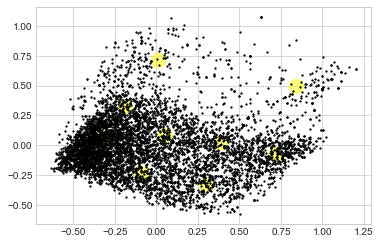

In [541]:
from sklearn.decomposition import PCA
#pca = PCA(n_components=17).fit(ndf)
reduced_data = PCA(n_components=2).fit_transform(ndf)
print( PCA(n_components=2).fit(ndf).explained_variance_ratio_)
kmeans.fit(reduced_data)
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);

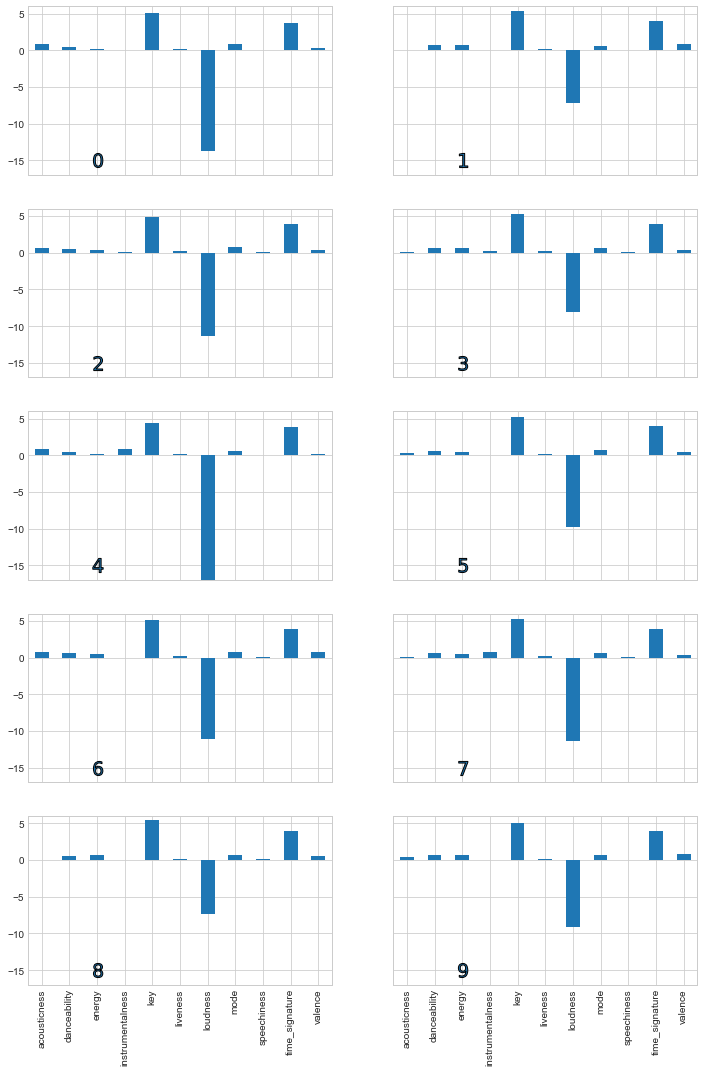

In [542]:
labels = kmeans.labels_

#Glue back to originaal data
def plot_center_cluster(songs, labels, nf, nc,list_x = [9,10], list_y =[1,3,5,7,9], fy= 18, fx = 12 ):
    songs['clusters'] = labels

    #Add the column into our list
    #clmns.extend(['clusters'])
    plt.figure(figsize=(fx,fy))
    #Lets analyze the clusters
    #print (songs.loc[:, :].groupby(['clusters']).mean())
    groups_songs = songs[songs.columns.difference(['duration_ms', 'year', 'rank', 'tempo'])].groupby(['clusters']).mean()
    #fig = plt.figure()
    #axes = fig.subplots(nrows=4, ncols=2)
    ng=1
    j = 0
    for group in groups_songs.iterrows():
        #print((group[1]))
        
        plt.subplot(nf, nc,ng )
        #plt.xlim(0,1)
        plt.ylim(-17,6)
 
    # Not ticks everywhere
        if ng not in list_x :
            plt.tick_params(labelbottom='off')
        if ng not in list_y :
            plt.tick_params(labelleft='off')
        if ng < nf*nc:
            ng +=1
        ax =group[1].plot.bar()
        ax.scatter(2, -15, marker='$%d$' % (j), alpha=1,  s=200, edgecolor='black')
        j +=1
    plt.show()
plot_center_cluster(songs, labels, 5, 2)

In [543]:
songs.loc[songs.clusters ==9,:]

,year,rank,song,singer,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,clusters
5,1940,6,Swinging On A Star,Bing Crosby,0.964,0.275,10,-13.516,1,0.0497,...,0.822,115.978,audio_features,1Gelr53RPFzaIwGSPNbqlT,spotify:track:1Gelr53RPFzaIwGSPNbqlT,https://api.spotify.com/v1/tracks/1Gelr53RPFza...,https://api.spotify.com/v1/audio-analysis/1Gel...,176480,4,9
21,1940,22,Brazil,Xavier Cugat Jimmy Dorsey (Bob Eberly &amp; ...,0.651,0.623,4,-8.327,0,0.0296,...,0.969,137.994,audio_features,2eKrf3Sv8PReqlcYanNYii,spotify:track:2eKrf3Sv8PReqlcYanNYii,https://api.spotify.com/v1/tracks/2eKrf3Sv8PRe...,https://api.spotify.com/v1/audio-analysis/2eKr...,110237,4,9
28,1940,29,This Land Is Your Land,Woody Guthrie,0.511,0.702,7,-4.895,1,0.0371,...,0.852,116.999,audio_features,6iLHSfrDwcdhVeyV3WXDBn,spotify:track:6iLHSfrDwcdhVeyV3WXDBn,https://api.spotify.com/v1/tracks/6iLHSfrDwcdh...,https://api.spotify.com/v1/audio-analysis/6iLH...,295613,4,9
50,1940,51,Rum And Coca-Cola,Andrews Sisters,0.779,0.633,10,-4.783,1,0.1360,...,0.884,80.076,audio_features,6wXR0IunPIfcvd6ASl9SDn,spotify:track:6wXR0IunPIfcvd6ASl9SDn,https://api.spotify.com/v1/tracks/6wXR0IunPIfc...,https://api.spotify.com/v1/audio-analysis/6wXR...,218533,4,9
51,1940,52,The Breeze And I,Jimmy Dorsey (Bob Eberly),0.524,0.472,4,-12.466,1,0.0320,...,0.775,130.444,audio_features,2ynAsq3MTsVlRtgg79xzek,spotify:track:2ynAsq3MTsVlRtgg79xzek,https://api.spotify.com/v1/tracks/2ynAsq3MTsVl...,https://api.spotify.com/v1/audio-analysis/2ynA...,169493,4,9
77,1940,78,Smoke! Smoke! Smoke! (That Cigarette),Tex Williams,0.828,0.446,6,-17.715,0,0.1010,...,0.971,125.940,audio_features,0UDytqREuzv0rDTBq7NNID,spotify:track:0UDytqREuzv0rDTBq7NNID,https://api.spotify.com/v1/tracks/0UDytqREuzv0...,https://api.spotify.com/v1/audio-analysis/0UDy...,159053,4,9
86,1940,87,Chattanoogie Shoe Shine Boy,Red Foley,0.616,0.599,10,-8.151,1,0.0661,...,0.653,150.192,audio_features,1MkRymdAdXl0h3LUhrUR5S,spotify:track:1MkRymdAdXl0h3LUhrUR5S,https://api.spotify.com/v1/tracks/1MkRymdAdXl0...,https://api.spotify.com/v1/audio-analysis/1MkR...,164565,4,9
94,1940,95,Jersey Bounce,Benny Goodman Jimmy Dorsey,0.708,0.555,0,-10.915,1,0.0335,...,0.622,97.950,audio_features,1lKSgSmv9ZrcKVKUzJtlAT,spotify:track:1lKSgSmv9ZrcKVKUzJtlAT,https://api.spotify.com/v1/tracks/1lKSgSmv9Zrc...,https://api.spotify.com/v1/audio-analysis/1lKS...,531293,4,9
97,1940,98,You Call Everybody Darlin’,Al Trace Andrews Sisters Anne Vincent,0.630,0.492,6,-11.616,1,0.0428,...,0.970,118.271,audio_features,2yRiJpbzFYQu0CLc9xLcga,spotify:track:2yRiJpbzFYQu0CLc9xLcga,https://api.spotify.com/v1/tracks/2yRiJpbzFYQu...,https://api.spotify.com/v1/audio-analysis/2yRi...,86987,4,9
192,1942,13,Jersey Bounce,Benny Goodman and His Orchestra,0.708,0.555,0,-10.915,1,0.0335,...,0.622,97.950,audio_features,1lKSgSmv9ZrcKVKUzJtlAT,spotify:track:1lKSgSmv9ZrcKVKUzJtlAT,https://api.spotify.com/v1/tracks/1lKSgSmv9Zrc...,https://api.spotify.com/v1/audio-analysis/1lKS...,531293,4,9


 * Como se puede extraer el *cluster 2:* Representa las canciones con mucha energia, que son *bailables*, con valencia *alta* lo que indica que son canciones de letras/tonadas alegres. Ejemplo de esto son **Money de Barret Strong (1960)** y **Hotline Bling de Drake (2016)**.
 * En el *cluster 0:* son canciones con menor nivel de energia, con letras y ritmo un poco más lento, no bailables en su mayoria, ejemplo de canciones que estan en este cluster son: ** Sorry de Beyonce (2016)** y **You’ll Never Know	de Dick Haymes (1940).**
 * En el *cluster 1* tenemos que son las canciones que con cierto nivel de acústica  (instrumentos acústicos), energia, pudieran ser bailables y también presentan gran sonoridad ejemplo de ellos tenemos que este cluster agrupa canciones como: **Starving de Hailee Steinfeld and Grey feat. Zed(2016)** y **The Andrews Sisters	Rum & Coca-Cola.**

 * El *cluster 6* presenta canciones con mucha acústica, poca energica, canciones/letras un poco más tristes y presentan mucha sonoridad con algunos solos instrumentales prolongados **Elastic Heart de Sia (2015)** y **Don’t know Why de Norah Jones (2003).**

 * En el *cluster 3* están las canciones con mucha acústica, se incluyen canciones como **Ordinary People de Jhon Legend (2005)** y **It’s So Hard To Say Goodbye To Yesterday de Boyz II Men** con predominancia de canciones del genero **Soul.**

 * El *Cluster 4* canciones acústicas y con letras/tonos alegres, que pueden ser canciones para bailar como **Brave de Sara Bareilles (2014)** y  **Pistol Packin’ Mama de Al Dexter & His Troops (1943)** canciones del género **pop.**

 * Tenemos en el *cluster 5* concentra  la mas alta media de acústica se destacan instrumentos como la guitarra y el piano a intervalos fijos, canciones con ritmo medio/lento y letras alegres se incluye en este canciones como: **Ho Hey de The Lumineers (2012)** y **She Belongs to The Devil	 de Washboard Sam (1941)** con estilos entre el **pop** y el **neo blues**

 * El *cluster 7* canciones lentas, con poco nivel acústico y si con presencia de canciones intrumentales, se incluyen **I’m Gonna Lose You de Meghan Trainor feat. John Legend (2015)** y ** Red River Rock de Johnny and The Hurricanes (1959).**


 * En el **cluster 8** se concentran canciones con mezcla de sonidos sinteticos y acústicos  con mucha sonoridad, también las las canciones de este grupo trnasmiten más sentimientos negativos,  se incluyen en este grupo canciones como **Closer de Chainsmokers feat. Halsey (2016)** y **Music Of My Heart de N'Sync and Gloria Estefan.**

 * Por último en el *cluster 9* tenemos canciones acústicas, no incluyen contenido hablado (como una estrofa de rap) pero que transmiten sentimientos positivos como  **Daughters de Jhon Mayer (2005)** y **Have You Ever Really Loved A Woman? de Bryan Adams (1995).**

Los clusters que arrojo el algoritmo fueron muy informativos, sin embargo categorizar y agrupar musica es una tarea muy subjetiva, ue en cierta forma esta sesgada por el hecho de que para el k-means se tenga que definir a priori el número de cluster.

Para ello vamos a aplicar un script de sklearn que nos da un incidio de cuantos clusters se deberian seleccionar:


### Primero con el *método de la silueta*, el cuál es una medida que indica que tan similiar es un objeto dentro de su cluster comparado con los otros clusters presentes

Esta métrica se basa en la siguiente formula:

$$ s(i) = \frac{b(i)-a(i)}{max\{(a(i), b(i)\} }$$

In [544]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


In [545]:


from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt



def plot_silhouette(X, range_n_clusters):
    plt.style.use('seaborn-whitegrid')
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i)*1.5 / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("El Grafico de silhouette para Distintos Clusters.")
        ax1.set_xlabel("Los Coeficientes values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float)*1.5 / n_clusters)
        #print("colors", colors)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette Analisis Para K-mean en Dataset Songs "
                      "Con n_clusters = %d" % n_clusters),
                     fontsize=13, fontweight='bold')

        plt.show()




For n_clusters = 2 The average silhouette_score is : 0.491756822255


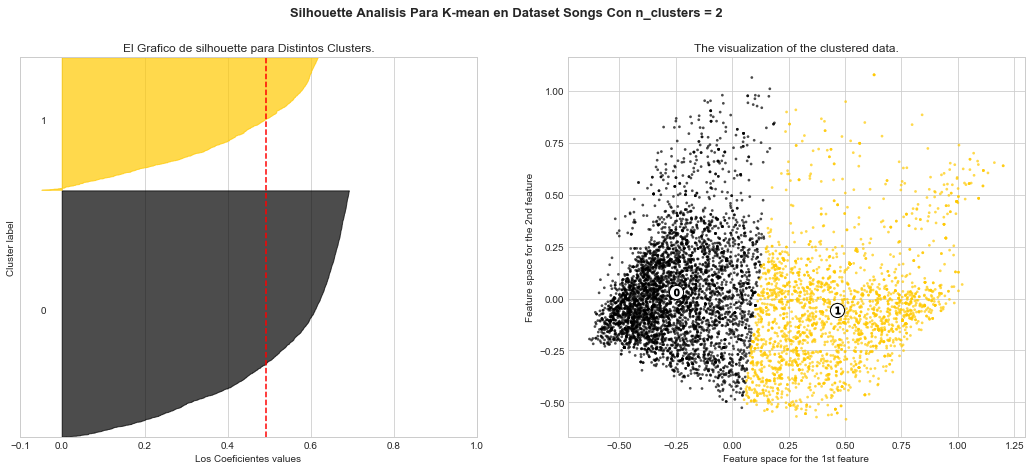

For n_clusters = 3 The average silhouette_score is : 0.408754291279


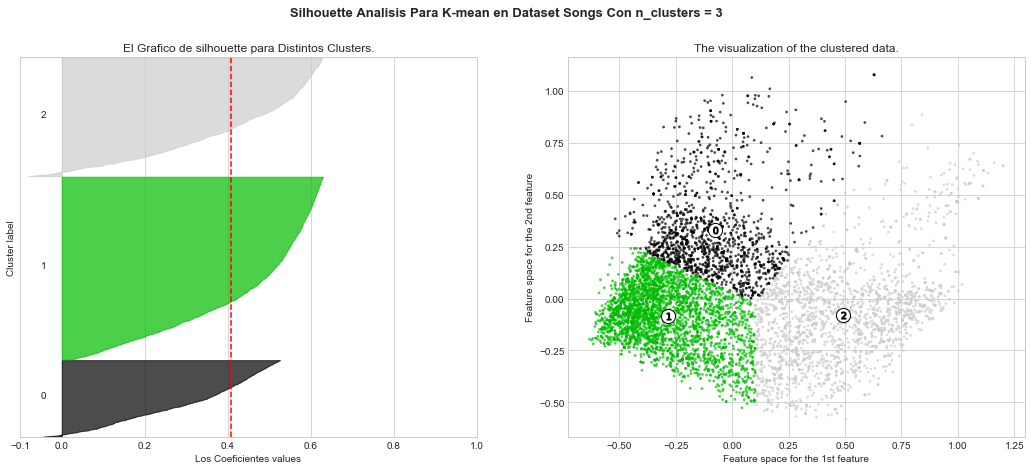

For n_clusters = 4 The average silhouette_score is : 0.411335188567


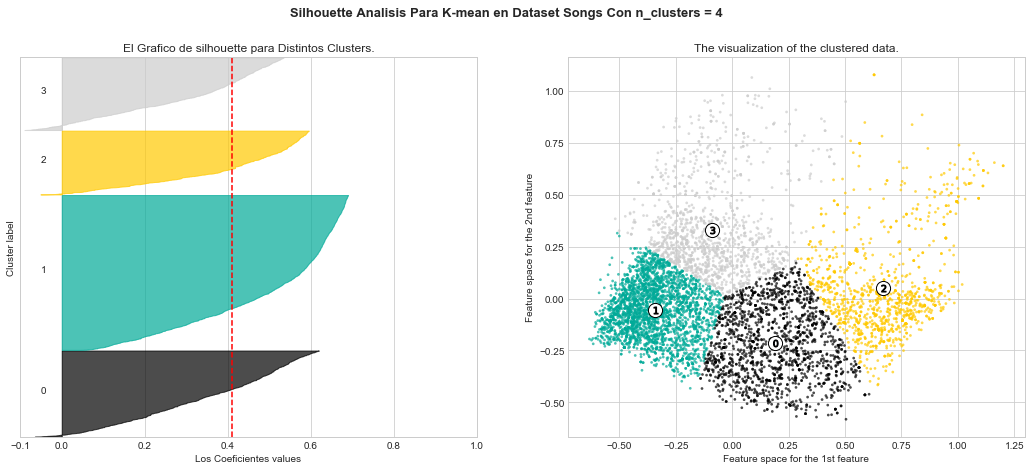

For n_clusters = 5 The average silhouette_score is : 0.406422698493


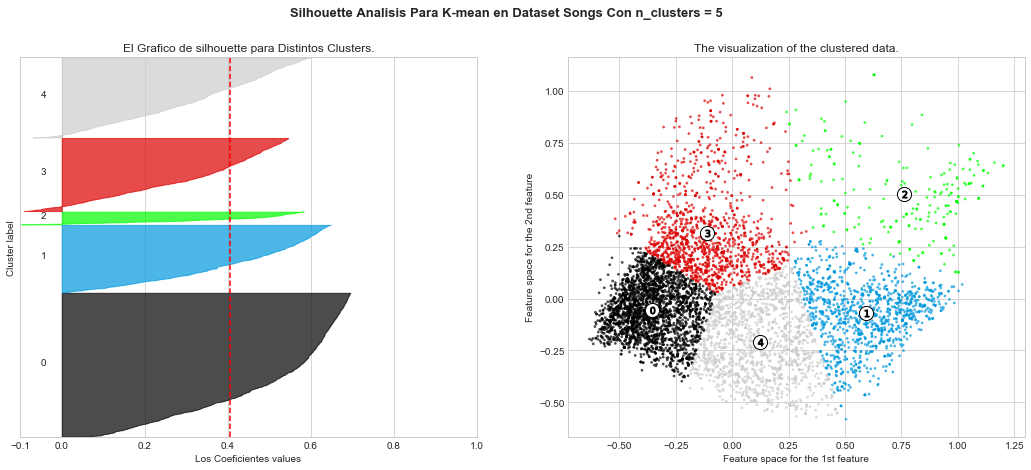

For n_clusters = 6 The average silhouette_score is : 0.413969162604


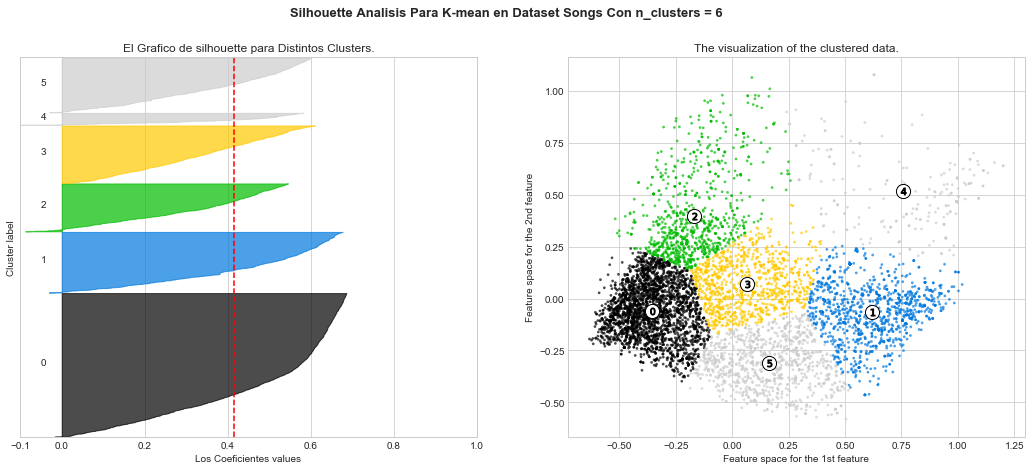

For n_clusters = 7 The average silhouette_score is : 0.387139812656


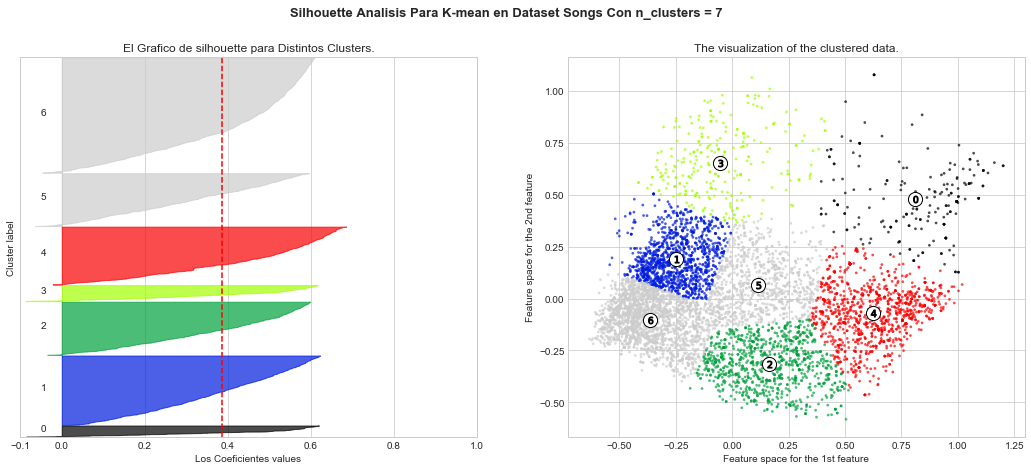

For n_clusters = 8 The average silhouette_score is : 0.39546634555


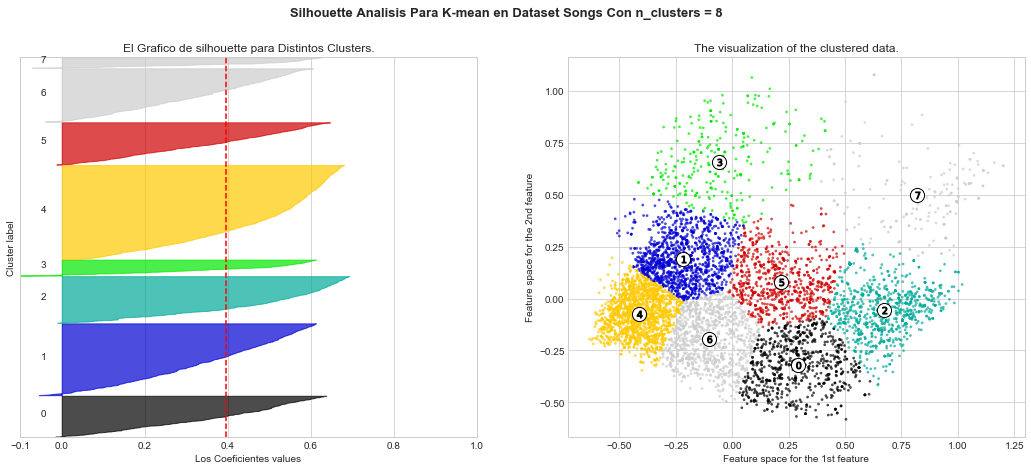

For n_clusters = 9 The average silhouette_score is : 0.376796337192


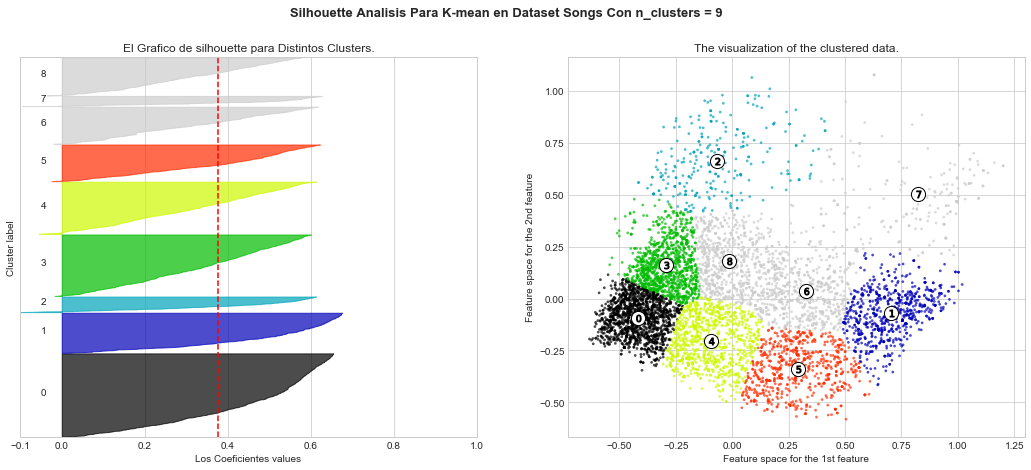

For n_clusters = 10 The average silhouette_score is : 0.361558539148


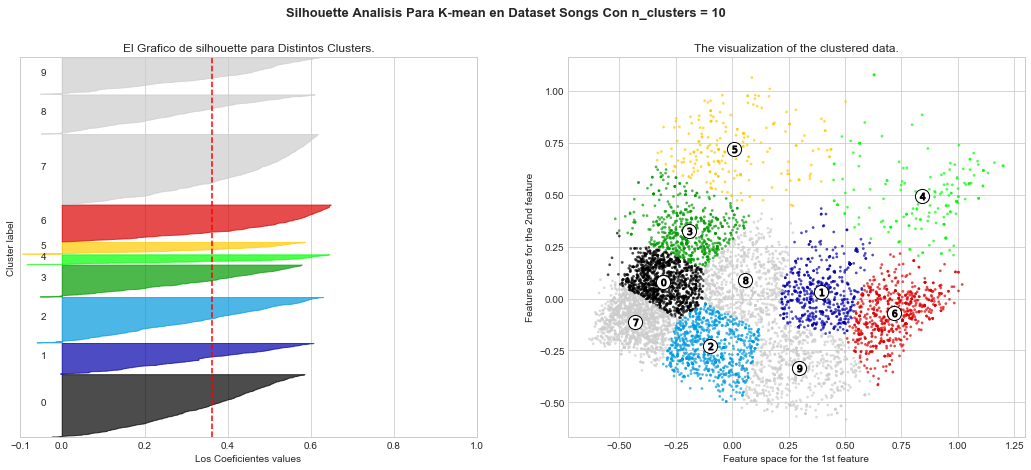

For n_clusters = 19 The average silhouette_score is : 0.351220492838


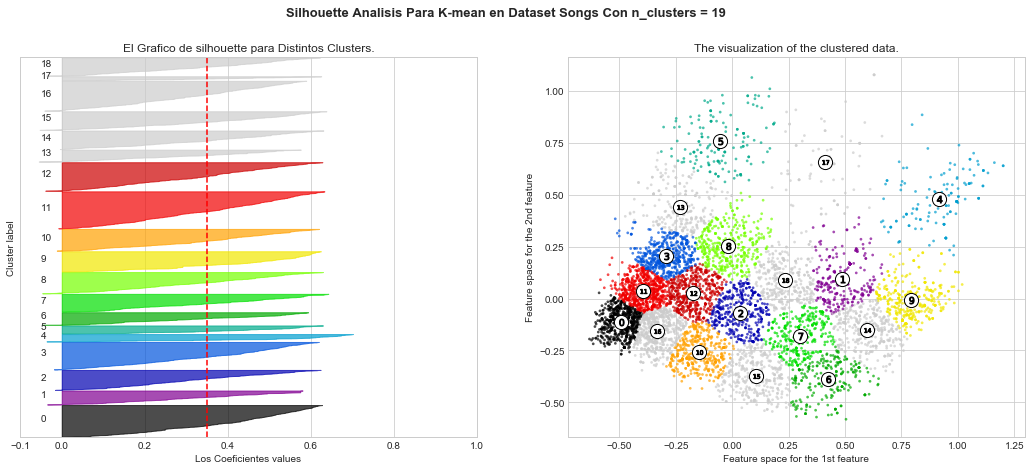

In [546]:
plot_silhouette(reduced_data, [2,3,4,5,6,7,8,9,10,19])

Como se observa y por la naturaleza de los datos (estamos analizando música la cual es muy subjetiva) los mismos se pueden agrupar de distintas formas, observando que por la silueta distintas cantidades de clusteres agrupan bien, sin embargo todo depende de los datos que se estan analizando en este caso tenemos que del scatterplot  (realizado con las 2 componentes principales), la cantidad de cluster podría estar entre 8-10, si suponemos que el algoritmo está agrupando por los principales generos musicales (alrededor de 10 siendo conservadores).
* Descartamos 2,3,4,5 cluster ya que los tamaños yo formas  de cada cluster varian signiticativamente, adémas de tener los más bajos _Silhouette score_ .
* Con el Cluster 6, 7 tenemos que la forma comienzan a ser más homogenea pero algunos cluster caen por debajo de la media los que podría indicar **coherencia interna baja.**

* Para los cluster 8,9,10 tenemos que el ancho y la forma de cada cluters son similares, aunque igualmente tenemos algunos cluster que caen por debajo de la media pero tambien presentan los más altos _Silhouette score_, con k=10 como la mejor opcion.

* Para el cluster k= 19 tenemos el _Silhouette score_ comienza a decaer, y las forma de los cluster podrían indicar solapamiento, por lo que descartamos este valor.
* De este análisis podemos selecionar k = 10.

## Con el Método del Codo:

Este método itera a través de distintos números de clusters luego grafica la inercia intra-cluster como funcion del número de cluster, la elección de la cantidad de cluster viene dada por la seleccion grafica del número de clusters a partir del cual los sucesivos incrementos del número de cluster **no** mejoran al modelo.

Basicamente con esto se trata de minimizar las distancias de cada punto al centro del cluster:

$$ {\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2} $$

siendo $ \mu_i$ el centro del cluster y $ x$  cada punto perteneciente al mismo.

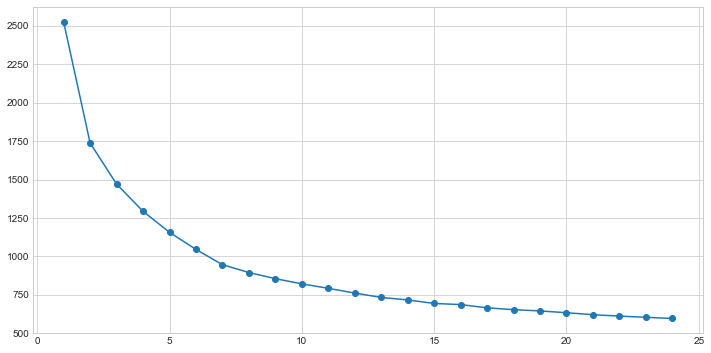

In [547]:
plt.style.use('seaborn-whitegrid')

cluster_range = range( 1, 25 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( ndf )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
ax = plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")


De la gráfica podemos notar que existe un quiebre en k=3,  k=10 y k = 15, por lo que nos apoyaremos en el  Método de Calinnski-Harabasz para tener otra referencia.

## Con el Método de Calinnski-Harabasz

Esta métrica está definida como la razón entre la dispersión interior de los clusters y la
dispersión entre los clusters

Definida con la siguiente ecuación:
    $$ CH = \frac{ SS_{B} }{ SS_{W} } \times \frac{ N-k }{ k-1 } $$
    
siendo $ k $  el número de clusters, $ N $ total de observaciones, $ SS_W $ representa la inercia intra-cluster y $ SS_B $ la inercia inter-cluster.


Lo que se desea es **maximizar** esta métrica

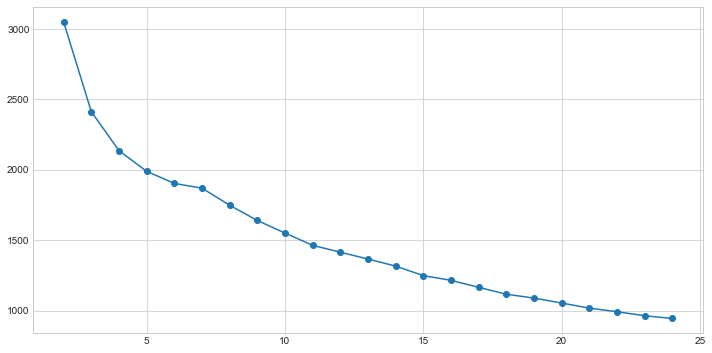

In [548]:
from sklearn.metrics import calinski_harabaz_score
#n_cluster = [i for i in range(2,20)]
cluster_range = range( 2, 25 )
cluster_errors = []
#print(n_cluster)
for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(ndf)
    labels = kmeans_model.labels_
    cluster_errors.append( calinski_harabaz_score(ndf, labels) )
    #print (k, calinski_harabaz_score(reduced_data, labels))
    
clusters_dfc = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_dfc.num_clusters, clusters_dfc.cluster_errors, marker = "o" )

Lamentablemente del gráfico no se pueden extraer conclusiones sobre la cantidad de cluster a elegir, por lo que aplicaremos  otros métodos de clustering.

## Clustering Jerárquico 

En este métodos de clustering  se construye una estructura en base a una medida de similitud entre los individuos, formando matrices de distancia; se subdividen en 2 tipos:
 * **Aglomerativos:** Inicialmente se forman clusters individuales, el algoritmo va sucesivamente agrupando en clusters más grandes. El procedimiento finaliza cuando
solo haya un cluster.
 * **Divisivos:** Se parte de un único cluster al que pertenecen todos los
elementos. El procedimiento
finaliza cuando hayan tanto clusters como individuos.


Para nuestro datos utilizaremos el tipo _aglomerativo_, vale destacar que en este exiten 3 métricas para decidir el agrupamiento
 * ward: une a los cluster de acuerdo a la minima distancia *euclídiana*
 * Average (promedio): busca minimizar la distancia promedio entre los cluster.
 * Complete: para cada par de cluster, se busca minimizar la máxima distancia entre ellos.

In [549]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


#### Método Ward

In [550]:
Z = linkage(ndf, 'ward')
c, coph_dists = cophenet(Z, pdist(ndf))
c
#(pdist(ndf, 'euclidean')).shape
#from scipy.spatial.distance import squareform
#res = pdist(ndf, 'euclidean')
#squareform(res) < 0.7


0.55713803281564467

Los cluster se suelen representar a tráves de Dendogramas:

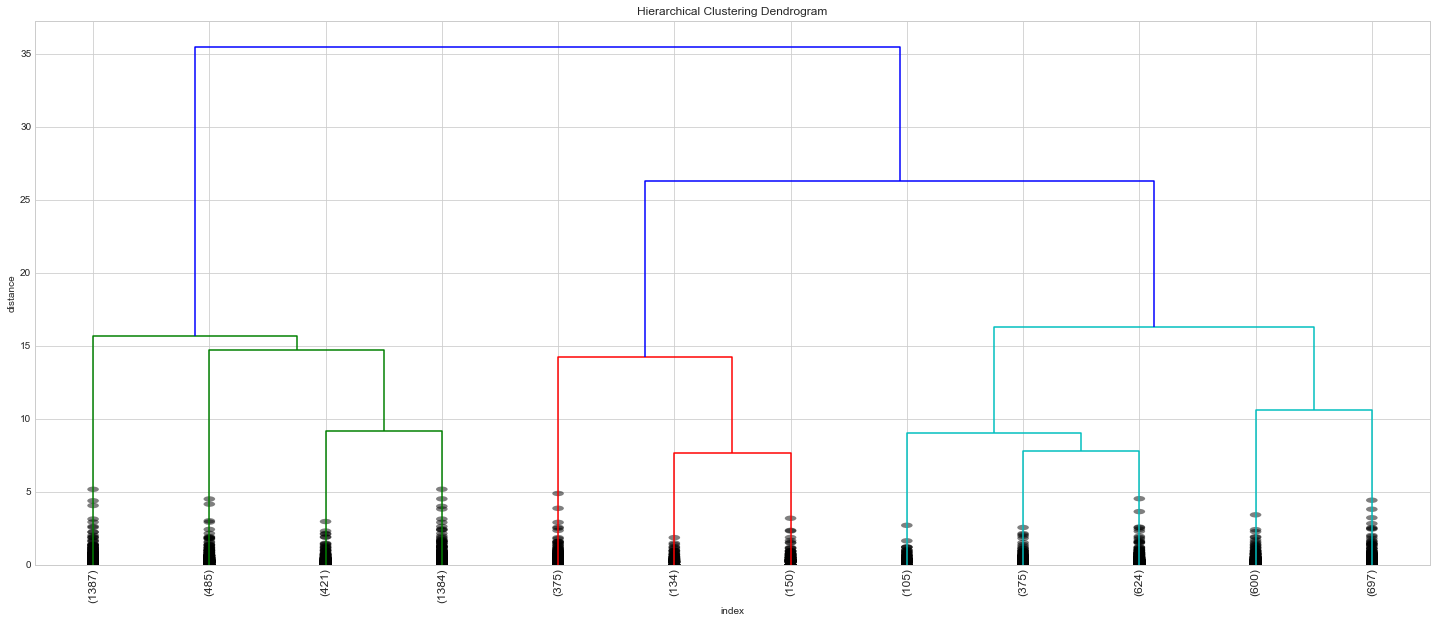

In [551]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

#### Con average:

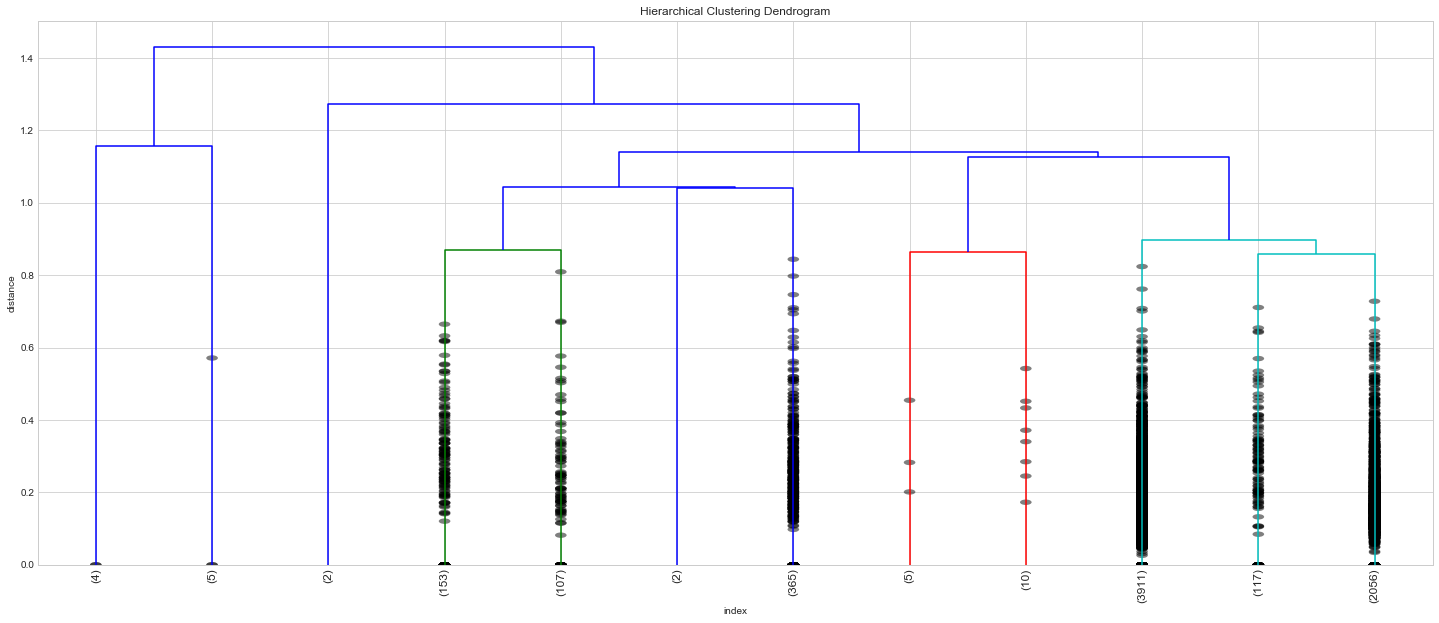

In [552]:
Z = linkage(ndf, 'average')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

#### Con Complete:

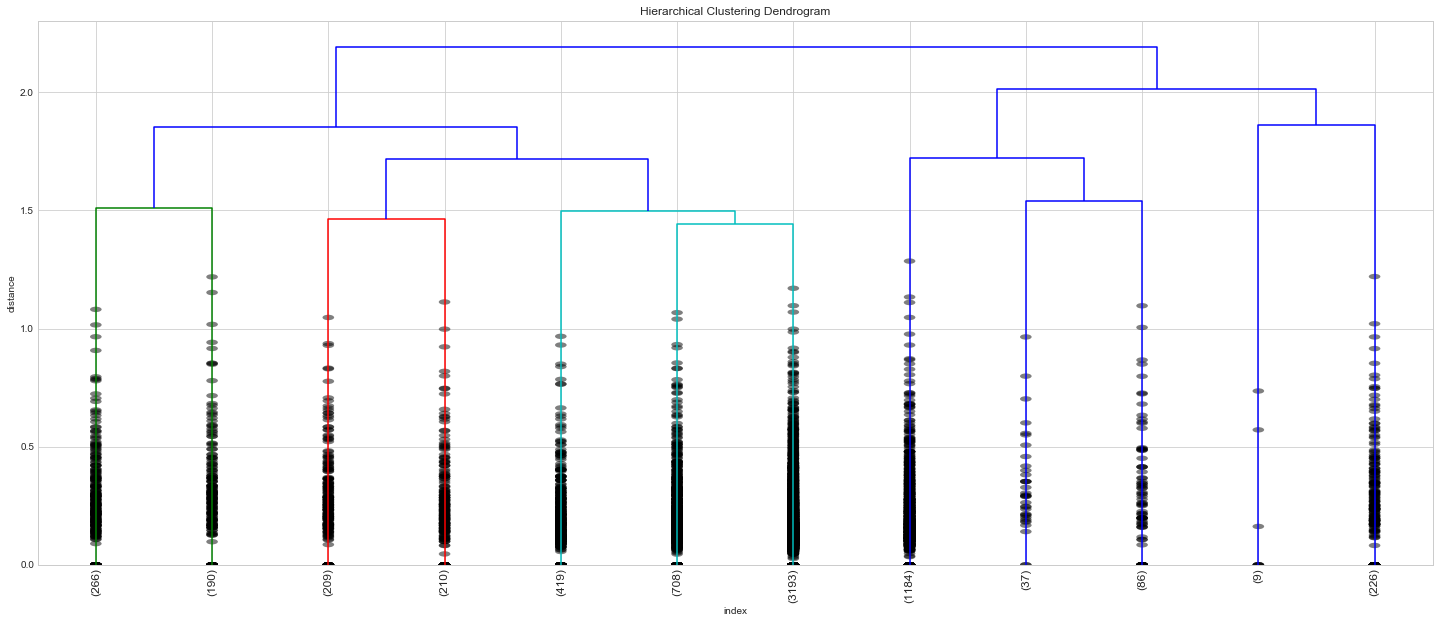

In [553]:
Z = linkage(ndf, 'complete')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(
     Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

Con los distinto metodos (_ward, complete y average_) es dificil  extraer conclusiones, ¿tal vez 3 cluster?

Revisaremos que caracteristicas tienen cada uno de los **3 clusters** arrojado con según *ward*

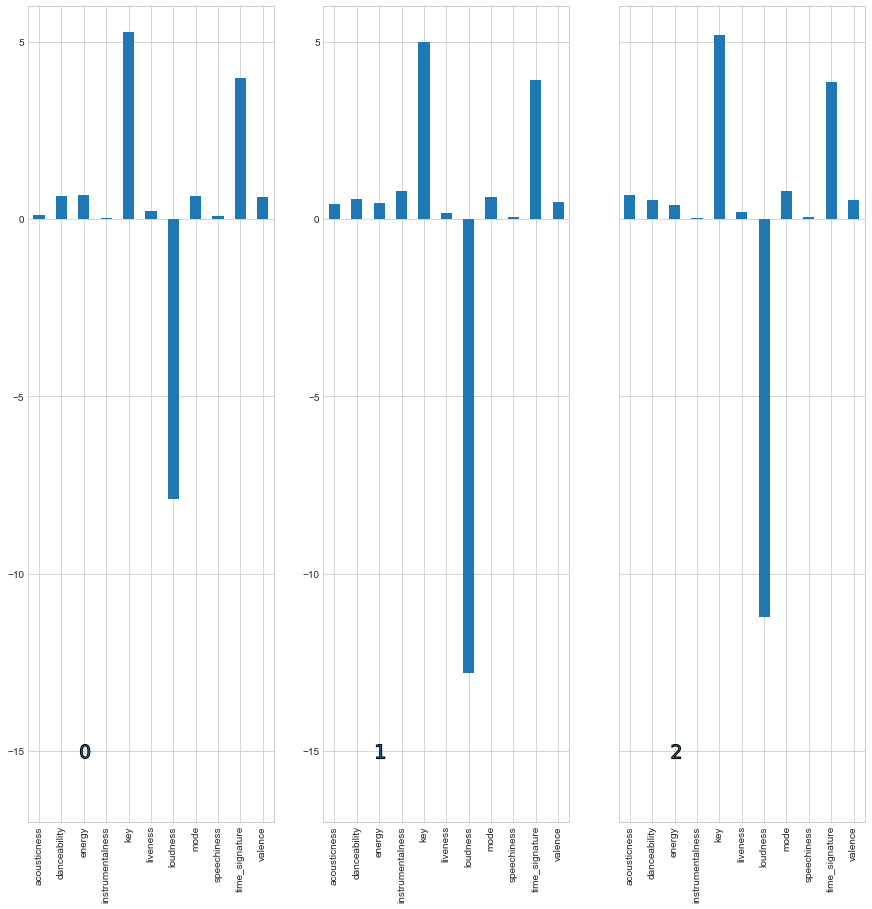

Silhouette Coefficient: 0.430


In [554]:
from scipy.cluster.hierarchy import fcluster
k=3
Z = linkage(ndf, 'ward')
labels = fcluster(Z, k, criterion='maxclust')
plot_center_cluster(songs, labels, 1,3,list_x=[1,2,3],list_y= [1,2,0],  fy= 15, fx = 15)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(ndf, labels, metric='sqeuclidean'))

In [555]:
songs.loc[songs.clusters ==3,:].head(500)

,year,rank,song,singer,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,clusters
0,1940,1,White Christmas,Bing Crosby,0.676,0.2930,11,-9.720,1,0.0366,...,0.3320,102.241,audio_features,0ggEJo3cuFtpj6Yzh3U3au,spotify:track:0ggEJo3cuFtpj6Yzh3U3au,https://api.spotify.com/v1/tracks/0ggEJo3cuFtp...,https://api.spotify.com/v1/audio-analysis/0ggE...,193387,4,3
1,1940,2,The Christmas Song,Nat “King” Cole,0.242,0.2430,7,-16.246,1,0.0337,...,0.1520,133.185,audio_features,6dFyDoMXhljPvqv0PdWKf7,spotify:track:6dFyDoMXhljPvqv0PdWKf7,https://api.spotify.com/v1/tracks/6dFyDoMXhljP...,https://api.spotify.com/v1/audio-analysis/6dFy...,219213,4,3
2,1940,3,God Bless The Child,Billie Holiday,0.254,0.1540,0,-13.296,1,0.0396,...,0.2430,174.018,audio_features,3XvnBthQEEN3TS0ruO2DWO,spotify:track:3XvnBthQEEN3TS0ruO2DWO,https://api.spotify.com/v1/tracks/3XvnBthQEEN3...,https://api.spotify.com/v1/audio-analysis/3Xvn...,181600,3,3
3,1940,4,Take The “A” Train,Duke Ellington,0.467,0.5240,9,-13.217,0,0.0547,...,0.6500,93.518,audio_features,7wIXVc9m8wRuP9YVALlQN7,spotify:track:7wIXVc9m8wRuP9YVALlQN7,https://api.spotify.com/v1/tracks/7wIXVc9m8wRu...,https://api.spotify.com/v1/audio-analysis/7wIX...,159133,4,3
5,1940,6,Swinging On A Star,Bing Crosby,0.964,0.2750,10,-13.516,1,0.0497,...,0.8220,115.978,audio_features,1Gelr53RPFzaIwGSPNbqlT,spotify:track:1Gelr53RPFzaIwGSPNbqlT,https://api.spotify.com/v1/tracks/1Gelr53RPFza...,https://api.spotify.com/v1/audio-analysis/1Gel...,176480,4,3
6,1940,7,You Always Hurt The One You Love,Mills Brothers,0.388,0.2510,6,-15.040,1,0.1310,...,0.2460,132.099,audio_features,0GPp6WSrMSs0y3AmFLK2iJ,spotify:track:0GPp6WSrMSs0y3AmFLK2iJ,https://api.spotify.com/v1/tracks/0GPp6WSrMSs0...,https://api.spotify.com/v1/audio-analysis/0GPp...,182533,4,3
7,1940,8,Boogie Woogie Bugle Boy,Andrews Sisters,0.650,0.4170,10,-10.349,1,0.0463,...,0.9240,78.201,audio_features,3FbVtdHTgBWZVtEJvzDlvP,spotify:track:3FbVtdHTgBWZVtEJvzDlvP,https://api.spotify.com/v1/tracks/3FbVtdHTgBWZ...,https://api.spotify.com/v1/audio-analysis/3FbV...,136707,4,3
8,1940,9,Chattanooga Choo Choo,Glenn Miller (Tex Beneke &amp;theModernaires),0.425,0.5700,1,-11.026,1,0.0506,...,0.7550,170.426,audio_features,3hvIhgOb5MenEDHQQRfzo6,spotify:track:3hvIhgOb5MenEDHQQRfzo6,https://api.spotify.com/v1/tracks/3hvIhgOb5Men...,https://api.spotify.com/v1/audio-analysis/3hvI...,204453,4,3
9,1940,10,Paper Doll,Mills Brothers,0.539,0.1660,0,-18.107,1,0.0611,...,0.3900,142.354,audio_features,5pgds9R3Q1d2CLeo4yRkVb,spotify:track:5pgds9R3Q1d2CLeo4yRkVb,https://api.spotify.com/v1/tracks/5pgds9R3Q1d2...,https://api.spotify.com/v1/audio-analysis/5pgd...,182000,4,3
10,1940,11,"Rudolph, The Red-Nosed Reindeer",Gene Autry,0.718,0.4250,2,-13.310,1,0.0847,...,0.9520,108.296,audio_features,66adQmwm3TP5B7pYcSge4v,spotify:track:66adQmwm3TP5B7pYcSge4v,https://api.spotify.com/v1/tracks/66adQmwm3TP5...,https://api.spotify.com/v1/audio-analysis/66ad...,84400,4,3


 * El cluster 0: parece agurpar las canciones con baja acústica y la más alta sonoridad, se incluyen canciones del genero pop como **Treat You Better de Shawn Mendes (2016)**  y del country como **RAGG MOPP  de Johnny Lee Wills & His Boys (1940)**. canciones con pocos intervalos de *solos.*
 * El cluster 1 parece agrupa canciones más bailables, con letras más ligeras/positivas, parece incluir canciones con mezcla pop-hip-hop-R&B como **Bang Bang  de Jessie J, Ariana Grande y Nicki Minaj (2015)** y  **At The Hop de Danny and The Juniors (1958)**
 * El cluster 2 muy similar al cluster 2, pero más contenido acústico se incluyen en este cluster **Rather Be deClean Bandit feat. Jess Glynne (2014)** y **Hard To Get de Gisele Mackenzie	(1955)**
 
 A juzgar por el *Silhouette Coefficient* este método separa razonablemnte bien a los cluster, pero parece estar agrupando principalmente de acuerdo a su nivel instrumental(*instrumentalness*), lo cual no es suficiente relevancia para agrupar las diferentes melodias presentes.

#### Con lo implementado hasta ahora nos quedan dudas de cual en el mejor método de clustering para nuestro set de datos por lo que trataremos de agrupar con técnicas basadas en distribuciones de probabilidad.

### Gaussian mixtures

Este método consiste en identificar cluster basado en distribuciones Gaussianas, comunmente se puede pensar a los modelos gmm com una genralizacion del k-means pero intorduciendo informacion sobre la covarianzas, a diferencia del k-means aquí los puntos son asignados con cierta probabilidad de pertenecer a un determinado cluster.


Implementaremos el clusterin *GMM* con diferentes *covarianzas*, utilizandos las 2 componentes principales y seleccionando igualmente los k= 10 correspondientes a los generos musicales mencionados.

Silhouette Coefficient: -0.219


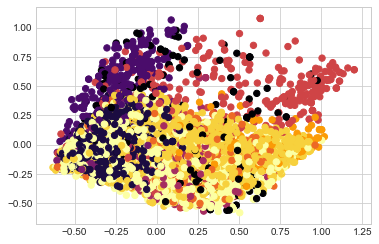

In [556]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics
gmm = GaussianMixture(n_components=10, covariance_type="full").fit(ndf)
labels = gmm.predict(ndf)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=40, cmap='inferno');
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(ndf, labels, metric='sqeuclidean'))

Esta opción agrupa mal con k= 10 

#### Con el tipo de covarianza _spherical_

Silhouette Coefficient: 0.288


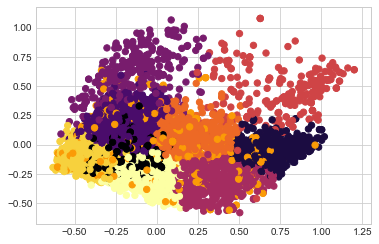

In [557]:

gmm = GaussianMixture(n_components=10, covariance_type="spherical").fit(ndf)
labels = gmm.predict(ndf)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=40, cmap='inferno');
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(ndf, labels, metric='sqeuclidean'))

Observamos que empeora los clusters formados

Por último se utilizara la covarianza _diag_

Silhouette Coefficient: -0.021


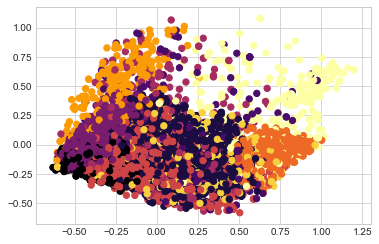

In [558]:

gmm = GaussianMixture(n_components=10, covariance_type="diag").fit(ndf)
labels = gmm.predict(ndf)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=40, cmap='inferno');
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(ndf, labels, metric='sqeuclidean'))

Se oberva que con estos metodos probabilísticos obtenemos un mejor desempeño cuando los cluster no son circulares

Veamos como está agrupando a los cluster:

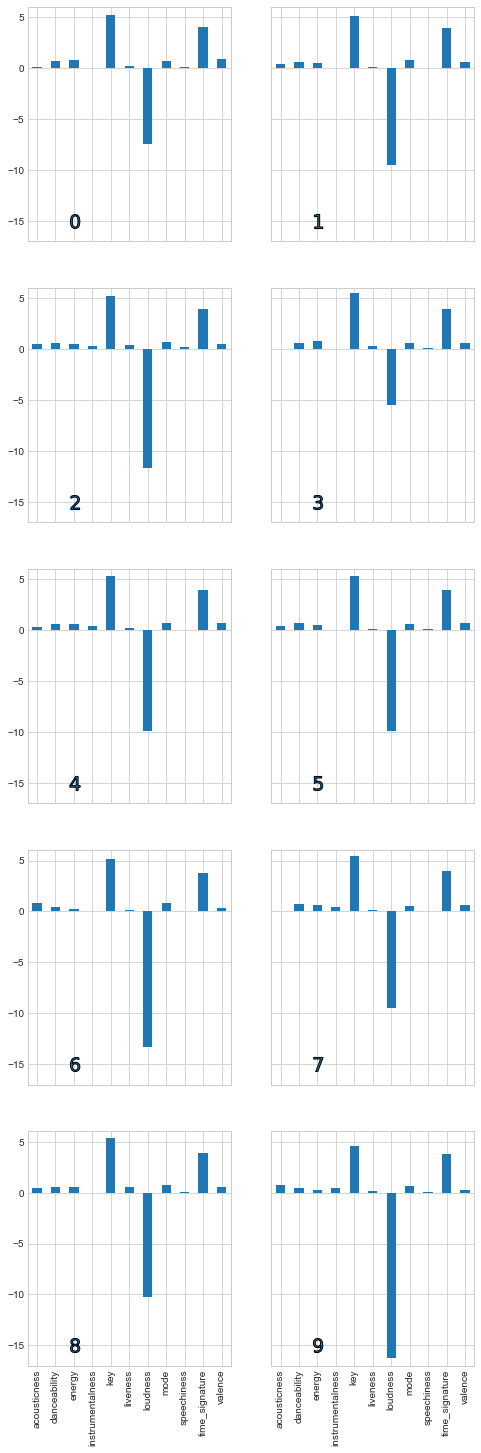

In [559]:
plot_center_cluster(songs, labels, nf=5, nc= 2, fy=25, fx=8)

* El cluster 0 agrupa canciones con poco o nada nivel acústico, bailables y con intervalos intrumentales, pudiera esta agrupando canciones inclinadas hacia el genero de música electronica y/o pop, se incluyen en este grupo **Starboy de Weeknd feat. Daft Punk (2016) ** y **Without You de Johnny Tillotson (1961)** 
* Cluster 1 agrupa con poco o nada de acústica y son no intrumentales ( es decir sin presencia no hay largos intervalos en la cual no hay acompañamiento cantado, sino sólo ejecución instrumental) ejemplo tenemos **	Somebody To Love de Queen (1977)** y **Island Girl de Elton John (1976)** con sonidos similares (**Rock**).
* En el Cluster 2 hay canciones con mucha energia y con algo de *speechiness* (esto es música *hablada* y/o *rapeada*) posiblemente del genero *soul, Jazz y/o R&B* como **Never, Never Gonna Give You Up de Barry White (1974)** y **Don’t Lie de The Black Eyed Peas	(2005)**
* Cluster 3 canciones con acústicas, con *speechiness*, parece agrupar las canciones del pop-rock-country, por ejemplo **Angel de Aerosmith (1988)** y **The Best Day de George Strait (2000)**
* El Cluster 4 canciones con mucha acústica, poca energia, baja sonoridad, canciones de *Soul, Blues, R&B, baladas pop* de estilo *lento* como **Let Her Go de Passenger (2014)** y  **My Heart Will Go de Celine Dion (1998)**
* En el Cluster 5 canciones con alta sonoridad, bailables con letras/melodias positivas como **Umbrella de Rihanna feat. Jay-Z (2007)** y **  I'm Still In Love With You de Sean Paul (2004)**
* El Cluster 6 presenta similitudes con el cluster 5, pero tiene mucha más acustica y mucha energia como **If You Go de Jon Secada (1994)**  y **The Longest Time de Billy Joel (1984)** 
* En Cluster 7 las canciones con letras/melodias más negativas, con acustica y con poca energia, caracteristicas del *Soul y del Blues así como las baladas Pop*  como **I Finally Found Someone de Barbra Streisand and Bryan Adams (1997)** y **If You're Not The One de Daniel Bedingfield**
* En el Cluster 8 tenemos similitudes con el cluster 7 con la salvedad que este cluster agrupa también a las canciones que no tienen *instrumentalness*, de nuevo canciones lentas y que transmiten "sensaciones negativas" como **Scarborough Fair / Canticle de Simon and Garfunkel (1968)** y **Right Here, Right Now de Jesus Jones (1991)**
* Por último en el cluster 9 tenemos canciones con muchas acústica y letras más *positivas* y con presencia de intervalos muy vocales, ejemplo tenemos  ** What’s New Pussycat? de 	Tom Jones (1965)** y **I’m Already There de Lonestar (2001)**

In [560]:
songs.loc[songs.clusters ==9,:"tempo"].tail(70)

,year,rank,song,singer,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
3285,1981,2,Diana Ross and Lionel Richie,Endless Love,0.674,0.26100,10,-16.639,1,0.0344,0.251000,0.86000,0.1340,0.4570,96.970
3311,1981,28,Air Supply,The One That You Love,0.448,0.41000,4,-8.984,1,0.0311,0.730000,0.04640,0.1020,0.1920,128.216
3331,1981,48,Alan Parsons Project,Time,0.345,0.35000,5,-12.701,0,0.0268,0.274000,0.06860,0.1430,0.1080,143.090
3365,1981,82,John Schneider,It’s Now Or Never,0.512,0.23100,9,-18.723,0,0.0542,0.995000,0.92600,0.1100,0.7800,156.247
3374,1981,91,Olivia Newton-John and Cliff Richard,Suddenly,0.489,0.37200,8,-10.026,1,0.0317,0.394000,0.87200,0.1820,0.2170,134.852
3395,1982,12,Vangelis,Chariots Of Fire,0.123,0.02390,1,-26.831,0,0.0417,0.852000,0.69900,0.0887,0.0322,70.569
3405,1982,22,Willie Nelson,Always On My Mind,0.529,0.30900,2,-12.207,1,0.0266,0.766000,0.00669,0.1390,0.2140,73.848
3439,1982,56,Royal Philharmonic Orchestra,Hooked On Classics,0.170,0.24900,2,-14.980,1,0.0356,0.921000,0.86900,0.0557,0.0729,78.908
3491,1983,8,Patti Austin and James Ingram,Baby Come To Me,0.510,0.50500,5,-7.079,1,0.0243,0.794000,0.33400,0.1100,0.1510,81.519
3495,1983,12,Eddie Rabbitt and Crystal Gayle,You And I,0.510,0.50500,5,-7.079,1,0.0243,0.794000,0.33400,0.1100,0.1510,81.519


## Spectral Clustering

Este técnica se basa en el uso de una matriz de afinidad simetrica para tratar los datos como un *grafos*, sin hacer suposiciones sobre la forma o distribución de los clusters. Esto generalmente se hace aplicando el algoritmo de knn para construir una representación de un gráfico que conecte solo los puntos del conjunto de datos más cercanos.

Silhouette Coefficient: 0.068


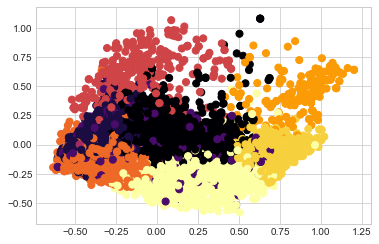

In [561]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=10, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(ndf)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels,
            s=50, cmap='inferno')
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(ndf, labels, metric='sqeuclidean'))

Los clusters están algo diferenciados pero notamos que el coeficientes es negativo, indicativo que los clusters se están solapando y/o asignando erroneamente, por lo que **descartamos este método** ya que no nos dice nada para estos datos.

### Revisemos ahora cual sera el resultado si aplicamos método de clustering donde _no_ se selecciona  **a priori** la cantidad de cluster deseada, sino que el algoritmo lo infiere, veamos:

## Clustering con el método de DBSCAN

Este es un método basdo en la densidad, cuya principal caracteristica es que no requiere que cada punto sea asignado a un clúster y, por lo tanto, no particiona los datos, sino que extrae los clústeres  más"densos" y etiqueta al resto como *ruido.*

Tiene 2 parametros que **si** debemos definirle el *eps* (máxima distancia entre 2 puntos para ser considerados en el mismo cluster, y el *min_samples* mínima cantidad de puntos(individuos) que debe tener un cluster.

 Veamos que puede extraer de nuestro datos (es este caso utilizaremos las componentes principales)

Estimated number of clusters: 1
Silhouette Coefficient: 0.281


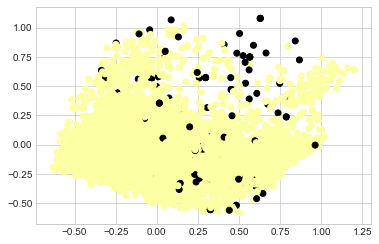

In [573]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.4, min_samples=50).fit(ndf)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
np.unique(labels)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='inferno')
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(reduced_data, labels, metric='sqeuclidean'))

###### Con este método se estima un total de ** 12 clusteres**, también notamos que el *Silhouette Coefficient* es muy alto , por lo que en teoría los clusters estan muy bine diferenciados. Puede ser que este agrupando más granularmente por genero.

## Clustering con Affinity Propagation

Affinity Propagation es una técnica de clustering que usa una aproximación basada en grafos, donde cada punto seleecionar al mejor candidato para formar el cluster, para posteriomente aplicar una proceso similar al k-means asignando los individuos al cluster más cercano, una de las ventajas es que no necesita especificar el número de cluster *a priori*, veamos que resulta de aplicar este algoritmo a nuestros datos:

hay 2 parámetros que deben ser ajustados: *preference* y  *damping*: 

In [584]:
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation( damping= 0.85, preference=-35.0).fit(ndf)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)


Estimated number of clusters: 11


Silhouette Coefficient: 0.269


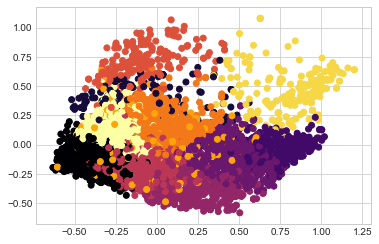

In [585]:
np.unique(labels)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='inferno')
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(ndf, labels, metric='sqeuclidean'))

plot_center_cluster(songs, labels)

### En resumen:

* El k-means es un algoritmo para particionar o
segmentar un conjunto de datos o individuos en grupos que
pueden ser disjuntos o no.  basados en la
similaridad de los datos, en nuestro caso se utilizo un archivo con metricas musicales que explicitamente son dificiles de separar ya que la musica es muy subjetiva.
* Una de las dificultades del Kmeans es que, primero se debe seleecionar los cluster previamente, y  como
los grupos no son dados a priori el experto debe dar una
interpretación de los grupos que se forman, es decir se debe conocer muy bien los datos.
* El método jeraquico es de utilidad si no se conoce a priori el número de cluster, si embargo en lento en ejecucíon y para nuestros datos *no* nos arrojó gandes avances, basta observar los dendogramas donde cortar ¿3?, ¿6? las distancias eran muy pequeñas para poder seleecionar un método con propiedad, al seleccionar 3 observamos los datos (canciones) presentes en cada cluster nos indicaban que no estaban muy bien agrupados.
* Los algoritmos basado en distribuciones Gaussianas nos arrojaron resultados consistentes con nuestra suposicion de agrupar por genero muscial, esto puede deberse a que nuestro datos estan muy concentrados y presentas zonas de gran densidad.
* Los Algoritmos basado  en *grafos* como el *Affinity Propagation* es un poderoso algoritmo sin embargo presenta el incoveniente  de que es un algoritmo lento y dificil de parametrizar ya que seleccionar su parámetros implica cierta dificultad.
* Por último cabe destacar que elegir un algoritmo de clasificacion no supervisado y seleccionar los parametros es un área de la ciencia de datos que es objeto de estudio activo ya que es tarea retadora que implica gran esfuerzo y conocimiento de los datos.
